In [1]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt


In [ ]:
import matplotlib.pyplot as plt
def plot_one_month():
    
    d = data.loc [data['Action'] == 'Downloading']
    d= d[d['Status'] == 'Completed']
    d['Hour']= d['Time'].dt.hour 
    x = d.groupby(['Hour']).count()['File']
    d = pd.DataFrame(x)
    d = d.rename(columns={'File':'Download'})

    u = data.loc [data['Action'] == 'Uploading']
    u= u[u['Status'] == 'Completed']
    u['Hour']= u['Time'].dt.hour 
    x = u.groupby(['Hour']).count()['File']
    u = pd.DataFrame(x)
    u=u.rename(columns={'File':'Upload'})
    all = d.join(u, on='Hour')

    all.plot( y=['Upload', 'Download'])
    plt.ylabel('No of files')
    data_date = data['Time'].dt.date.unique()[0]
    plt.title (data_date)
    plt.show()

In [20]:
SAMPLE = None # number of files to load, 'None' for load all
import os
def load_all_files():
    timex = []
    files = []
    actions=[]
    status = []

    ach_log_dir = os.path.join(".",'data','SystemLog')
    for i,f in enumerate(os.listdir(ach_log_dir)):

        if SAMPLE and i> SAMPLE:
            break
        _, file_extension = os.path.splitext(f)
        if file_extension != '.txt':
            print (f)
            continue
        with open(os.path.join(ach_log_dir,f), 'rt') as fp:
            while(True):
                try:
                    line = fp.readline()
                except:
                    print (f, line)
                    continue
                if not line:
                    break
                
                try:
                    x = line.split('::::')
                    fdt_time = x[0] 
                    action = x[1].split()[0]
                except:
                    # print (line_no, 'error parsing action:', line)
                    action = '***'
                    fdt_time = ''

                ls = line.split('"')
                if len(ls) > 1:
                    file_name = ls[1]
                    ls = ls[2].split()
                    download_status = ls[0] if len(ls) > 0 else ''
                else:
                    file_name = ''
                    download_status = ''
                # print(line_no, '- ', fdt_time, '----',action, '***', file_name)
                timex.append(fdt_time)
                files.append(file_name)
                actions.append(action)
                status.append(download_status)
                # line_no += 1
    data1={ 'Time':timex,
        'File': files,
        'Action':actions,
        'Status': status
    }   
    data = pd.DataFrame(data1)
    data['Time'] = pd.to_datetime(data['Time'])
    data.to_csv(os.path.join('.','data','ach_log_data_all.csv'))
    
load_all_files()

Load data from csv file

In [2]:
import pandas as pd
data = pd.read_csv(os.path.join('.','data','ach_log_data_all.csv'), parse_dates=['Time'])
data

,Unnamed: 0,Time,File,Action,Status
0,0,2020-01-01 00:00:09,NaN,Open,NaN
1,1,2020-01-01 02:05:14,29_PRESETTLEMENT_202001010206220818.xml,Downloading,......
2,2,2020-01-01 02:05:14,29_PRESETTLEMENT_202001010206220818.xml,Downloading,Completed
3,3,2020-01-01 02:05:20,29_PRESETTLEMENT_202001010206220818.xml,Decrypting,......
4,4,2020-01-01 02:05:20,29_PRESETTLEMENT_202001010206220818.xml,Decrypting,Completed
...,...,...,...,...,...
3708213,3708213,2020-12-31 20:32:21,29_PACS004_20201231203209229079.xml,Delivery,Completed
3708214,3708214,2020-12-31 20:32:21,29_PACS002_20201231203209510062_S.xml,Decrypting,......
3708215,3708215,2020-12-31 20:32:22,29_PACS002_20201231203209510062_S.xml,Decrypting,Completed
3708216,3708216,2020-12-31 20:32:22,D:\ACHFiles_WorkStation\AutoDownloaded\Payment...,File,NaN


### Clean Data, remove duplicate file/action/status/date

Summaries data for download/upload count file

In [51]:
d = data.loc [(data['Action'] == 'Downloading') & (data['Status'] == 'Completed')].copy()
d['Date'] = d['Time'].dt.date
d.drop_duplicates(subset=['File', 'Action', 'Status', 'Date'], keep='first')
x = d.groupby(['Date']).count()['File']
d = pd.DataFrame(x)
d = d.rename(columns={'File':'Download'})

u = data.loc [(data['Action'] == 'Uploading') & (data['Status'] == 'Completed')].copy()
u['Date']= u['Time'].dt.date 
u.drop_duplicates(subset=['File', 'Action', 'Status', 'Date'], keep='first')
x = u.groupby(['Date']).count()['File']
# x = u.groupby(['Time'].dt.date).count()['File']
u = pd.DataFrame(x) # reset index
u=u.rename(columns={'File':'Upload'})
file_count = d.join(u, on='Date')


In [30]:
file_count.head()

,Download,Upload
Date,,
2019-10-22,255,4.0
2019-10-23,356,3.0
2019-10-24,394,5.0
2019-10-25,2,NaN
2019-10-27,465,4.0


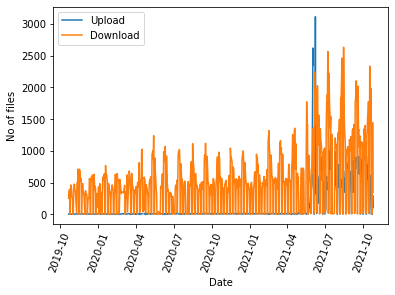

In [52]:
file_count.plot( y=['Upload', 'Download'])
plt.ylabel('No of files')
# data_date = data['Time'].dt.date.unique()[0]  
plt.xticks(rotation = 70)
# plt.title (data_date)
plt.show()

### plot upload/download number of files for a given period

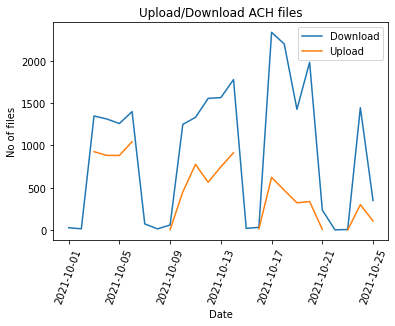

In [53]:
from_dt = '2021-10-01'
to_dt   = '2021-10-31'
file_count.loc[np.datetime64(from_dt): np.datetime64(to_dt)].plot()

plt.ylabel('No of files')
plt.xticks(rotation = 70)
plt.title ('Upload/Download ACH files')
plt.show()


Combine dataframe for elapsed time for upload/download time

In [216]:
data.columns

Index(['Unnamed: 0', 'Time', 'File', 'Action', 'Status'], dtype='object')

In [3]:
d1 = data.copy()
d1['Date']=d1['Time'].dt.date 
d1=d1.drop_duplicates(subset=['File', 'Action', 'Status', 'Date'], keep='first')
# d1[d1.duplicated(['File', 'Action', 'Status', 'Date'], keep = False)]

start = d1[['Time','File', 'Action', 'Date']].loc[(data['Status'] == '......') & (data['Action'].isin(['Downloading','Uploading'])) ]
end = d1[['Time','File', 'Action', 'Date']].loc[(data['Status'] == 'Completed') & (data['Action'].isin(['Downloading','Uploading'])) ]
end.columns =['End', 'File', 'Action', 'Date']
# start
# end
# load_time=start.join(end.set_index(['File','Action', 'Date']), on=['File', 'Action', 'Date'])
load_time=start.merge(end, on=['File', 'Action', 'Date'])
load_time['Elapsed']= (load_time['End'] - load_time['Time']).dt.total_seconds()
load_time=load_time.loc[load_time['Elapsed'] >= 0]  # remove -ve elpased time

Test

Plot download/upload eplased time per dates for a given day

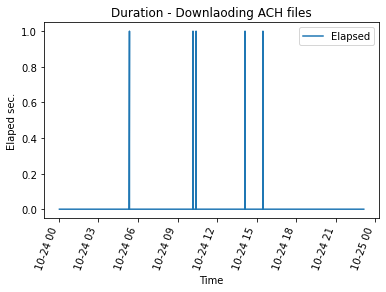

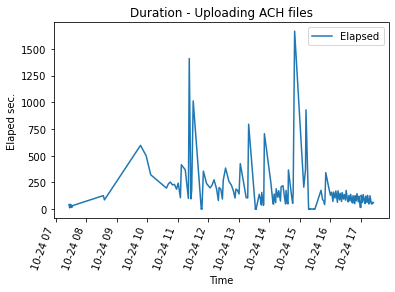

In [11]:
plot_date = '2021-10-24'
x=load_time.loc[load_time['Time'].dt.date == np.datetime64(plot_date)].set_index(['Time'])# limit the plot for one day 
p1=x.loc[x['Action'] == 'Downloading'].plot(y='Elapsed')
plt.ylabel('Elaped sec.')
plt.xticks(rotation = 70)
plt.title ('Duration - Downlaoding ACH files')
plt.show()
p2=x.loc[x['Action'] == 'Uploading'].plot(y='Elapsed')
plt.ylabel('Elaped sec.')
plt.xticks(rotation = 70)
plt.title ('Duration - Uploading ACH files')
plt.show()

Plot both donwload & upload in the same graph

C:\Users\yahia\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='Time'>

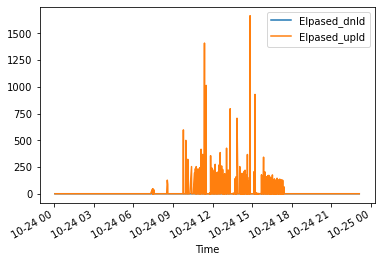

In [10]:
plot_date = '2021-10-24'
x=load_time.loc[load_time['Time'].dt.date == np.datetime64(plot_date)].copy()# limit the plot for one day 
x.reset_index(inplace=True)
x['Elpased_dnld'] = 0
x['Elpased_dnld'].loc[x['Action'] == 'Downloading']= x['Elapsed']
x['Elpased_upld'] = 0
x['Elpased_upld'].loc[x['Action'] == 'Uploading'] = x['Elapsed']
x.plot(x='Time', y=['Elpased_dnld','Elpased_upld' ])
# x.plot(x=).area(figsize=(12, 4), subplots=True)
# x

<AxesSubplot:xlabel='Time'>

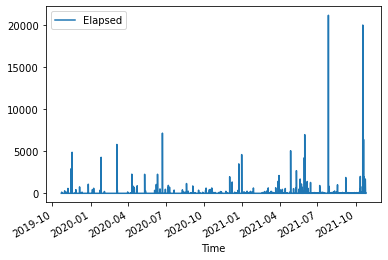

In [13]:
load_time.plot(x='Time', y=['Elapsed'])

Drill down on the data

In [20]:
load_time[load_time['Elapsed'] > 600]   # 68 file
# load_time[load_time['File']== '29_PACS008_2021051915083670803.XML']
# d1[d1['File']== '29_PACS008_2021051915083670803.XML']
# load_time
f = load_time[load_time['Elapsed'] > 600]['File']   #files processed in more 10 min
data[data['File'].isin(f)].to_csv(os.path.join('.', 'out', 'more than 6 min.csv'))

Some records seems misleading. make more investigation for this peak
Find files with upload/download elapsed time of more than x seconds

In [19]:
# load_time['Elapsed'].max()
# load_time.loc[load_time['Status'] == 'failed']
data.loc[data['Status'] == 'failed'].to_csv(os.path.join('.', 'out', 'failed.csv'))